
# Superstore Data Analyzing

# Import Python library  

In [1]:
## To load the data into pandas, 
## we must first import the packages that we’ll be using.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Exploring the Data

In [2]:
# We can use pandas to read in the CSV file with the 'read_csv' method.

data = pd.read_csv('Desktop/superstore.csv',encoding = "ISO-8859-1" )

In [3]:
data.shape

(51290, 24)

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [6]:
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

## Analyzing The Data

In [7]:
#===============================================================================
#1. Who are the top-20 most profitable customers. Show them through plots.
#===============================================================================

In [8]:
result = data.groupby(['Customer Name'])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending=False).head(20)

In [9]:
result.head()

,Customer Name,Profit
731,Tamara Chand,8672.89890
623,Raymond Buch,8453.04950
672,Sanjit Chand,8205.37990
335,Hunter Lopez,7816.56778
88,Bill Eplett,7410.00530


In [10]:
print(type(result))
print("####################    Difference   #################")
print(result.dtypes)

<class 'pandas.core.frame.DataFrame'>
####################    Difference   #################
Customer Name     object
Profit           float64
dtype: object


In [11]:
result.shape

(20, 2)

In [12]:
result

,Customer Name,Profit
731,Tamara Chand,8672.89890
623,Raymond Buch,8453.04950
672,Sanjit Chand,8205.37990
335,Hunter Lopez,7816.56778
88,Bill Eplett,7410.00530
323,Harry Marie,6958.28640
727,Susan Pistek,6484.40726
542,Mike Gockenbach,6458.67620
6,Adrian Barton,6417.28450
758,Tom Ashbrook,6311.97910


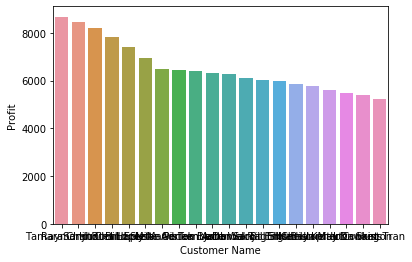

In [13]:
sns.barplot(x='Customer Name',y='Profit',data=result)

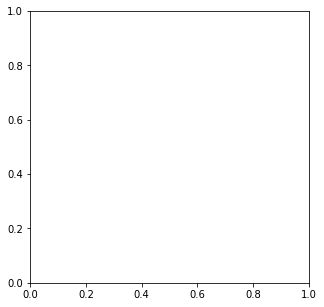

In [14]:
fig = plt.figure(figsize=(5,5))
ax_1 = fig.add_subplot(111)

In [15]:
sns.barplot(x='Customer Name',y='Profit',data=result,ax=ax_1)

In [16]:
ax_1.set_ylabel("Profit",fontname="Arial",fontsize=12)

Text(3.200000000000003, 0.5, 'Profit')

In [17]:
# Set the title to Comic Sans
ax_1.set_title("Top 20 Customers",fontname='Comic Sans MS',fontsize=18)

Text(0.5, 1, 'Top 20 Customers')

In [18]:
# Set the font name for axis tick labels to be Comic Sans
for tick in ax_1.get_xticklabels():
    tick.set_fontname("Comic Sans MS")
    tick.set_fontsize(12)
for tick in ax_1.get_yticklabels():
    tick.set_fontname("Comic Sans MS")
    tick.set_fontsize(12)

In [19]:
# Rotate the labels as the Customer names overwrites on top of each other
ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation = 45)

[Text(0.0, 0, 'Tamara Chand'),
 Text(0.2, 0, 'Raymond Buch'),
 Text(0.4, 0, 'Sanjit Chand'),
 Text(0.6000000000000001, 0, 'Hunter Lopez'),
 Text(0.8, 0, 'Bill Eplett'),
 Text(1.0, 0, 'Harry Marie'),
 Text(0, 0, 'Susan Pistek'),
 Text(0, 0, 'Mike Gockenbach'),
 Text(0, 0, 'Adrian Barton'),
 Text(0, 0, 'Tom Ashbrook'),
 Text(0, 0, 'Jane Waco'),
 Text(0, 0, 'Daniel Raglin'),
 Text(0, 0, 'Sanjit Engle'),
 Text(0, 0, 'Bill Shonely'),
 Text(0, 0, 'Ellis Ballard'),
 Text(0, 0, 'Nathan Mautz'),
 Text(0, 0, 'Christopher Conant'),
 Text(0, 0, 'Keith Dawkins'),
 Text(0, 0, 'John Huston'),
 Text(0, 0, 'Greg Tran')]

In [20]:
plt.show()

In [21]:
#=================================================================================
# 2. What is the distribution of our customer segment
#=================================================================================

In [22]:
descending_order = data['Segment'].value_counts().index

In [23]:
data.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

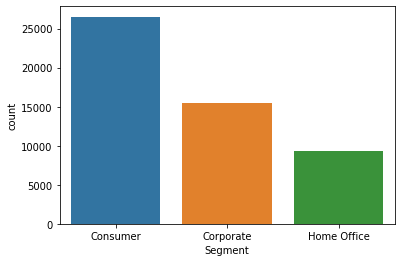

In [24]:
sns.countplot("Segment", data = data, order = descending_order)

In [25]:
#=====================================================================================
#3. Who are our top-20 oldest customers
#=====================================================================================

In [26]:
data.dtypes.value_counts()

object     17
float64     5
int64       2
dtype: int64

In [27]:
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [28]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [29]:
oldest = pd.DataFrame({'Count':data.groupby(['Order Date','Profit']).size()}).reset_index()

In [30]:
oldest.head(20)

,Order Date,Profit,Count
0,2011-01-01,-26.0550,1
1,2011-01-01,15.3420,1
2,2011-01-01,29.6400,1
3,2011-01-01,36.0360,1
4,2011-01-01,37.7700,1
5,2011-01-01,106.1400,1
6,2011-01-02,-19.1360,1
7,2011-01-02,-0.9840,1
8,2011-01-02,0.0000,1
9,2011-01-02,3.4196,1


In [31]:
#=========================================================================================
#4. Which customers have visited this store just once
#==========================================================================================

In [32]:
Customers_visit = pd.DataFrame({'Count' : data.groupby(["Customer Name"]).size()}).reset_index()

In [33]:
Customers_visit[Customers_visit['Count']==1]

,Customer Name,Count


In [34]:
#==========================================================================================
#5. Relationship of Order Priority and Profit
#==========================================================================================
data['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

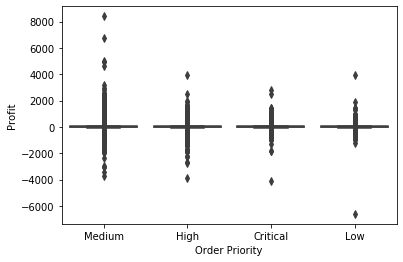

In [35]:
sns.boxplot("Order Priority","Profit",data=data)

In [36]:
#==========================================================================================
#6. What is the distribution of customers Market wise?
#==========================================================================================

In [37]:
print(data.shape)
data['Market'].value_counts()

(51290, 24)


APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [38]:
Customers_market = pd.DataFrame({'Count' : data.groupby(["Market","Customer Name"]).size()}).reset_index()
print(Customers_market.shape)

(4872, 3)


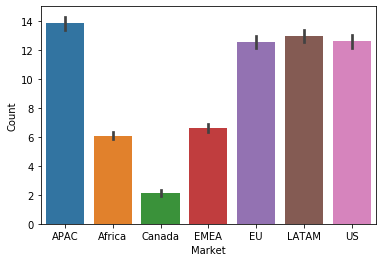

In [39]:
sns.barplot(x = "Market",y= "Count",data=Customers_market)

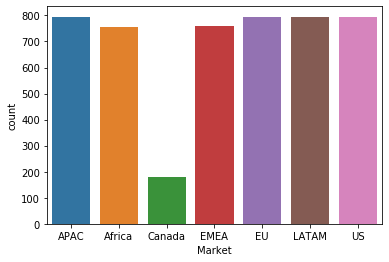

In [40]:
sns.countplot("Market",data=Customers_market)

In [41]:
#==========================================================================================
#7. What is the distribution of customers Market wise and Region wise
#==========================================================================================

In [42]:
data['Region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [43]:
Customers_market_region = pd.DataFrame({'Count' : data.groupby(["Market","Region","Customer Name"]).size()}).reset_index()

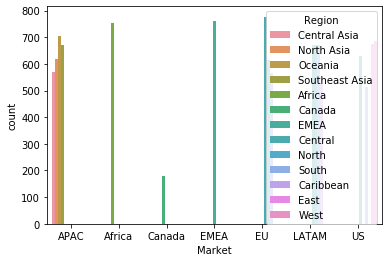

In [44]:
sns.countplot("Market",hue="Region",data=Customers_market_region)

In [45]:
#==========================================================================================
#8.Distribution of  Customers by Country & State - top 15
#==========================================================================================

In [46]:
Customers_Country = pd.DataFrame({'Count' : data.groupby(["Country","State"]).size()}).reset_index().sort_values('Count',ascending = False).head(15)

In [47]:
Customers_Country

,Country,State,Count
1025,United States,California,2001
1019,United Kingdom,England,1499
1052,United States,New York,1128
1063,United States,Texas,985
336,France,Ile-de-France,981
56,Australia,New South Wales,781
361,Germany,North Rhine-Westphalia,719
58,Australia,Queensland,717
316,El Salvador,San Salvador,615
1058,United States,Pennsylvania,587


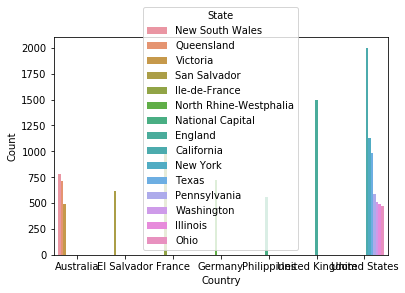

In [48]:
sns.barplot(x="Country",y="Count",hue="State",data=Customers_Country.sort_values('Country'))

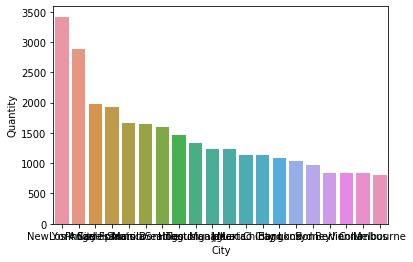

In [49]:
# Top 20 Cities by Sales Volume
sale_cities = data.groupby(["City"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(20)
sns.barplot(x = "City",y="Quantity",data=sale_cities,)

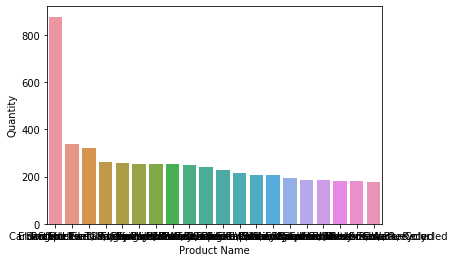

In [50]:
# top 10 products
sale_Products = data.groupby(["Product Name"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(20)
sns.barplot(x = "Product Name",y="Quantity",data=sale_Products)
#Staples is the largest selling product

In [51]:
# sales by product Category, Sub-category
sale_category = data.groupby(["Category","Sub-Category"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False)
sale_category

,Category,Sub-Category,Quantity
6,Office Supplies,Binders,21429
11,Office Supplies,Storage,16917
5,Office Supplies,Art,16301
10,Office Supplies,Paper,12822
1,Furniture,Chairs,12336
16,Technology,Phones,11870
2,Furniture,Furnishings,11225
13,Technology,Accessories,10946
9,Office Supplies,Labels,9322
12,Office Supplies,Supplies,8543


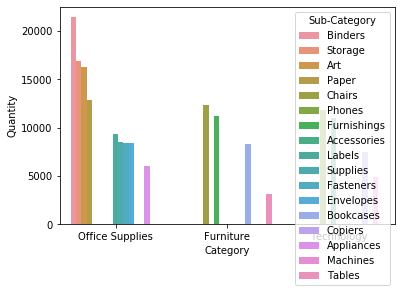

In [52]:
sns.barplot(x="Category",hue="Sub-Category",y="Quantity",data=sale_category)

In [53]:
# top selling products by countries (in US)
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [54]:
sale_Products_Country = data.groupby(["Product Name","Country"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False)

In [55]:
sale_Products_Country = data.groupby(["Product Name","Country"])['Quantity'].sum().reset_index().sort_values('Quantity',ascending = False)

In [56]:
sale_Products_Country

,Product Name,Country,Quantity
28614,Staples,United States,876
18111,KI Adjustable-Height Table,United States,74
3676,Avery Non-Stick Binders,United States,71
29786,Storex Dura Pro Binders,United States,71
13256,GBC Premium Transparent Covers with Diagonal L...,United States,67
27131,"Situations Contoured Folding Chairs, 4/Set",United States,64
8348,Chromcraft Round Conference Tables,United States,61
11028,Eldon Wave Desk Accessories,United States,61
13329,"Global Wood Trimmed Manager's Task Chair, Khaki",United States,59
31419,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,United States,59


In [57]:
type(sale_Products_Country)

pandas.core.frame.DataFrame

In [58]:
spc = sale_Products_Country[sale_Products_Country['Country'] == "United States"].sort_values('Quantity',ascending = False).head(20)

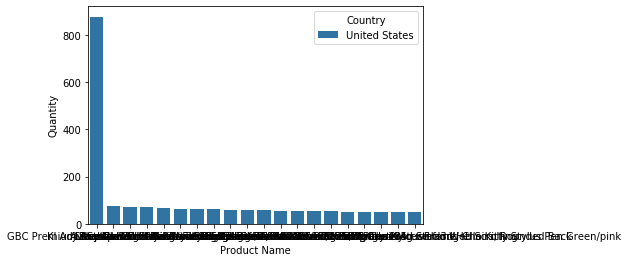

In [59]:
sns.barplot(x="Product Name",hue="Country",y="Quantity",data=spc)